In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:

def _find_signal_peaks(osc_screen, threshold, offset=0):
    # TODO: calibrate this
    peaks = np.where(np.diff(osc_screen) > threshold)[0]
    sampling_rate = 125e6
    return peaks/sampling_rate + offset

def _count_photons(osc_screen):
    # TODO: save threshold in configuration.
    times = _find_signal_peaks(-osc_screen, 0.5)
    return len(times)

def find_edges(data, threshold, kernel=(1,-1), clean=True):
    dd = np.convolve(data, kernel, mode='valid')
    edges = np.where(dd < threshold)[0]

    if clean:
        e_prev=0
        for i, e in enumerate(edges):
            if e-e_prev < 2:
                edges[i] = -1
            e_prev = e
        edges = edges[edges >= 0]
    return edges

In [3]:
minwl, maxwl = 400, 700
spectrum = np.zeros(maxwl - minwl)
for i, wl in enumerate(range(minwl, maxwl)):
    counts = 0
    for j in range(76):
        df = pd.read_pickle(f'/home/tomi/Documents/academicos/facultad/tesis/tesis/data/27-03/exp_1/spectrum/{wl}/{str(j).zfill(3)}.pickle')
        #counts += _count_photons(df["ch1"])
        counts += len(find_edges(df["ch1"], -1))
    spectrum[i] = counts


In [4]:
%matplotlib widget

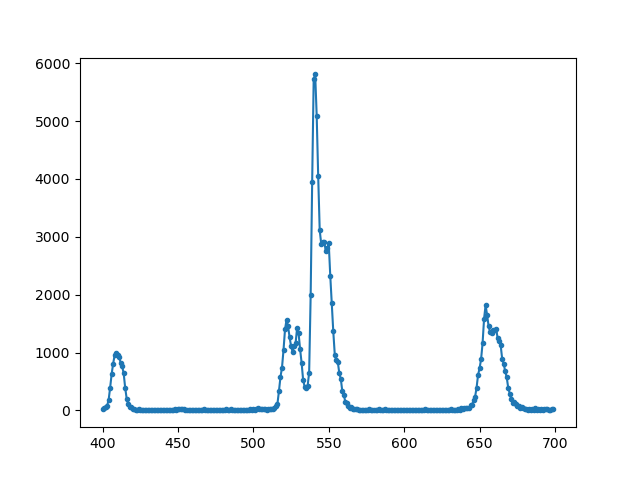

In [5]:
plt.close('all')
plt.plot(np.arange(minwl, maxwl, 1), spectrum, '.-')
plt.show()

In [6]:
common_path = '/home/tomi/Documents/academicos/facultad/tesis/tesis/data/27-03/exp_1/lifetime'
wavelengths = [409, 522, 529, 541, 550, 556, 654, 660]
lifetimes_data = []
for wl in sorted(os.listdir(common_path)):
    times = np.array([])
    print(wl)
    for tdly in sorted(os.listdir(f'{common_path}/{wl}')):
        print("\t",tdly)
        for filename in sorted(os.listdir(f'{common_path}/{wl}/{tdly}')):
            df = pd.read_pickle(f'{common_path}/{wl}/{tdly}/{filename}')
            edges = find_edges(df["ch1"], -1)
            ts = np.array(df.iloc[edges]["time"])
            times = np.hstack((times, ts))
    lifetimes_data.append(times)

409
	 01
	 02
	 03
	 04
	 05
	 06
	 07
	 08
	 09
	 10
	 11
	 12
	 13
	 14
	 15
522
	 01
	 02
	 03
	 04
	 05
	 06
	 07
	 08
	 09
	 10
	 11
	 12
	 13
	 14
	 15
529
	 01
	 02
	 03
	 04
	 05
	 06
	 07
	 08
	 09
	 10
	 11
	 12
	 13
	 14
	 15
541
	 01
	 02
	 03
	 04
	 05
	 06
	 07
	 08
	 09
	 10
	 11
	 12
	 13
	 14
	 15
550
	 01
	 02
	 03
	 04
	 05
	 06
	 07
	 08
	 09
	 10
	 11
	 12
	 13
	 14
	 15
556
	 01
	 02
	 03
	 04
	 05
	 06
	 07
	 08
	 09
	 10
	 11
654
	 01
	 02
	 03
	 04
	 05
	 06
	 07
	 08
	 09
	 10
660
	 01
	 02
	 03
	 04
	 05
	 06
	 07
	 08
	 09
	 10


In [11]:
print(times)
plt.close('all')
%matplotlib inline

[3.791200e-05 3.805600e-05 1.117280e-04 ... 1.275984e-03 1.276016e-03
 1.276048e-03]


8
1.1876015815435106


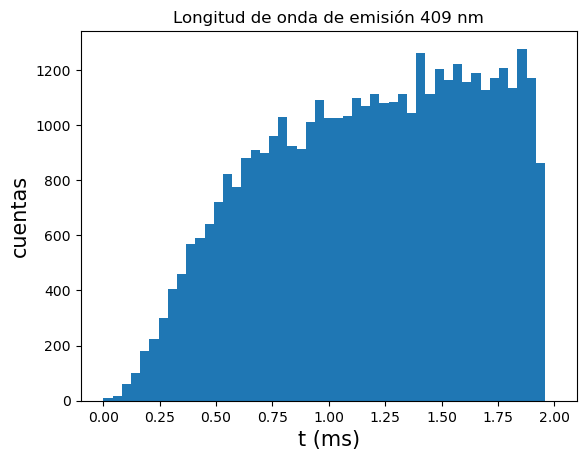

1.144188595884577


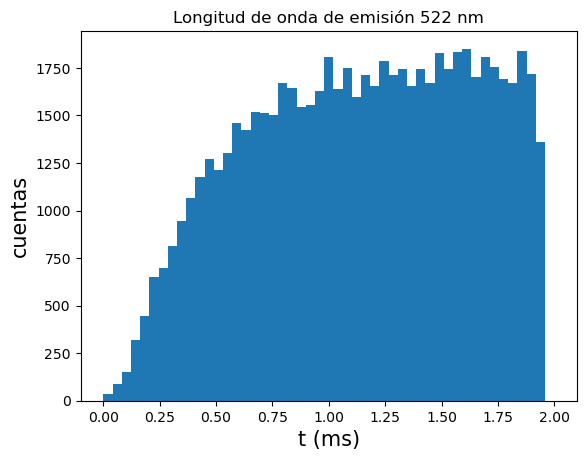

1.146794294037741


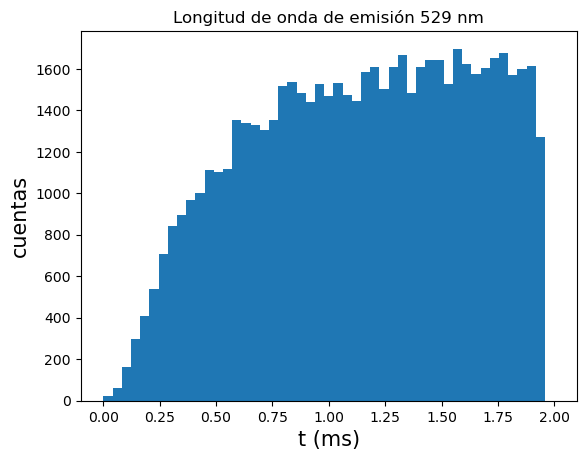

1.1483192079930182


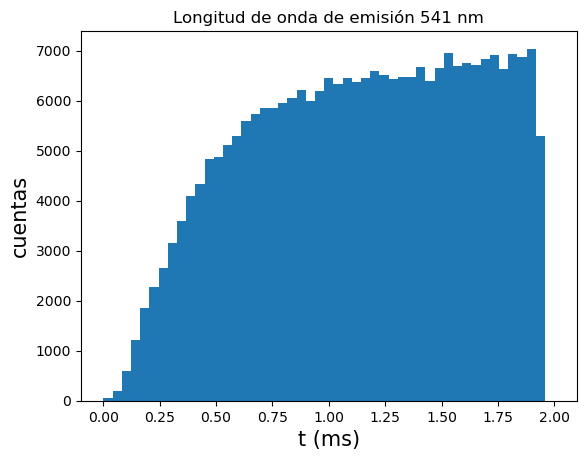

1.1517002091980635


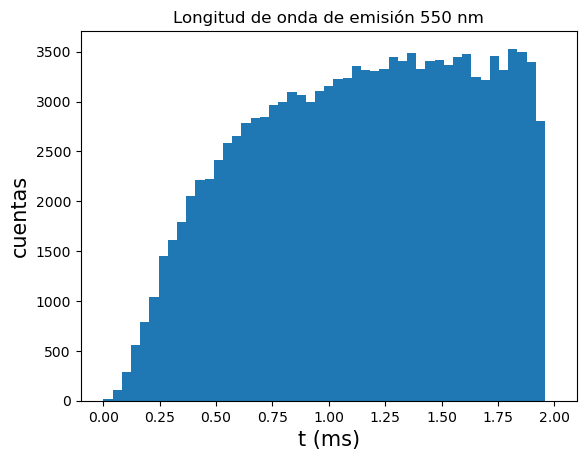

0.8904125159013797


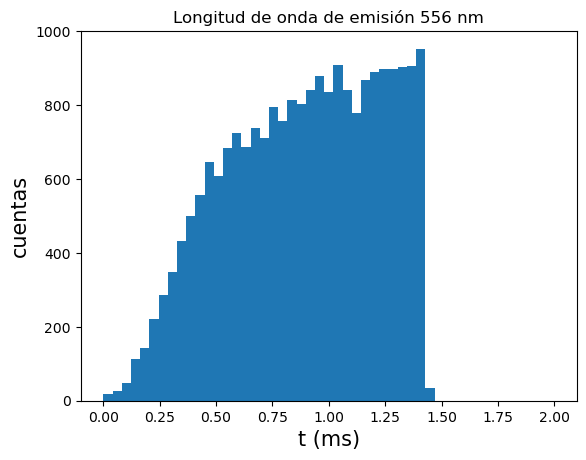

0.859073944208258


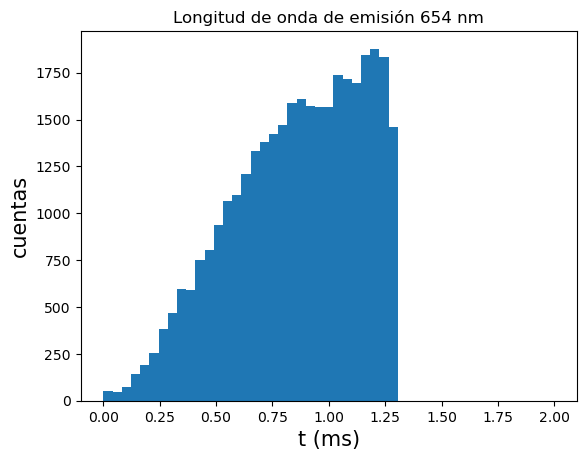

0.8591997552063755


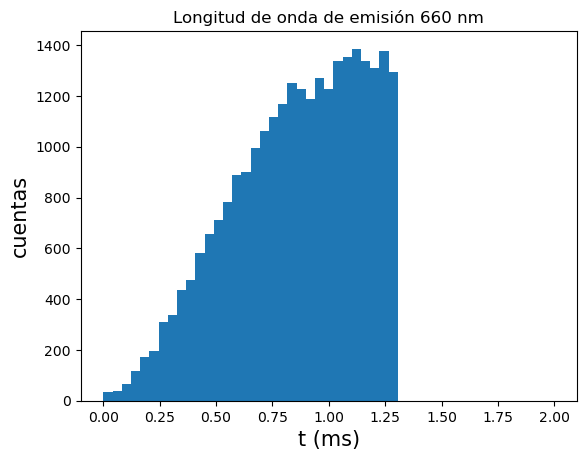

In [17]:

bins = np.linspace(0, 2e-3, 50)
print(len(lifetimes_data))
for wl, lt in zip(wavelengths, lifetimes_data):
    print(np.mean(lt * 1e3))
    freq, bin_edges = np.histogram(lt, density=False, bins=bins)
    plt.title(f"Longitud de onda de emisión {wl} nm")
    plt.ylabel("cuentas", fontsize=15)
    plt.xlabel("t (ms)", fontsize=15)
    plt.stairs(freq, bin_edges*1e3, fill=True)
    plt.show()